<center><h1 style="font-size:2em;color:#2467C0;font-family:Times New Roman">Tagesaufgaben Hyperparameter</h1></center>

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading" style="font-size:1em">Aufgabe1:</h4>
  <hr>

   <h4>
      Lade den Datensatz breast_cancer.csv und erstelle daraus ein Modell, mit dem die Diagnose vorausgesagt werden kann (M für bösartig, B für gutartig). Nutze Hyperparameteroptimierungsprozesse! Testsize=0.2
</h4>
</div>

In [105]:
# imports
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [106]:
# load data to df
breast_cancer_data = pd.read_csv("breast_cancer.csv")
breast_cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [107]:
# searching for NaN
breast_cancer_data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [108]:
# drop NaN's
breast_cancer_data.drop(["Unnamed: 32", "id"], axis=1, inplace=True)

In [109]:
# searching for NaN
breast_cancer_data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [110]:
# defining X & y
X = breast_cancer_data.select_dtypes("number")
y = breast_cancer_data["diagnosis"]

In [111]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,
													y,
													test_size=0.2,
													random_state=42,
													stratify=y
													)

In [112]:
# distribution "diagnosis"
breast_cancer_data["diagnosis"].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In [113]:
# distribution "diagnosis" compare to y_train
y_train.value_counts(normalize=True)

diagnosis
B    0.626374
M    0.373626
Name: proportion, dtype: float64

In [114]:
# distribution "diagnosis" compare to y_test
y_test.value_counts(normalize=True)

diagnosis
B    0.631579
M    0.368421
Name: proportion, dtype: float64

In [115]:
# knn
knn = KNeighborsClassifier()

In [116]:
# crossvalidation
knn_cv = cross_val_score(
	knn,
	X_train,
	y_train,
	cv=5,
	scoring="accuracy",
	verbose=3
)

[CV] END ................................ score: (test=0.945) total time=   0.0s
[CV] END ................................ score: (test=0.945) total time=   0.0s
[CV] END ................................ score: (test=0.934) total time=   0.0s
[CV] END ................................ score: (test=0.901) total time=   0.0s
[CV] END ................................ score: (test=0.846) total time=   0.0s


In [117]:
# knn_cv
knn_cv

array([0.94505495, 0.94505495, 0.93406593, 0.9010989 , 0.84615385])

In [118]:
# mean accuracy for 5 folds
knn_cv_mean = knn_cv.mean()
print(f"Mean accuracy for 5 folds: {knn_cv_mean:.3f}")

Mean accuracy for 5 folds: 0.914


In [119]:
# prepare model, compare error_rates & cv
# counting trainings
error_rates = []
trainings = 0

for i in range(1, 31):
	knn = KNeighborsClassifier(i)
	knn_cv = cross_val_score(knn, X_train, y_train, cv=5,
							 scoring="accuracy", verbose=3)
	error_rate = 1 - knn_cv.mean()
	error_rates.append(error_rate)
	trainings += len(knn_cv)

[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.956) total time=   0.0s
[CV] END ................................ score: (test=0.934) total time=   0.0s
[CV] END ................................ score: (test=0.890) total time=   0.0s
[CV] END ................................ score: (test=0.868) total time=   0.0s
[CV] END ................................ score: (test=0.934) total time=   0.0s
[CV] END ................................ score: (test=0.934) total time=   0.0s
[CV] END ................................ score: (test=0.912) total time=   0.0s
[CV] END ................................ score: (test=0.923) total time=   0.0s
[CV] END ................................ score: (test=0.868) total time=   0.0s
[CV] END ................................ score: (test=0.945) total time=   0.0s
[CV] END ................................ score: (test=0.956) total time=   0.0s
[CV] END ...................

In [120]:
# error_rates
error_rates

[np.float64(0.08571428571428574),
 np.float64(0.08571428571428574),
 np.float64(0.07912087912087917),
 np.float64(0.08351648351648355),
 np.float64(0.08571428571428574),
 np.float64(0.07912087912087917),
 np.float64(0.07692307692307698),
 np.float64(0.07692307692307698),
 np.float64(0.07692307692307698),
 np.float64(0.07912087912087917),
 np.float64(0.07472527472527479),
 np.float64(0.08131868131868136),
 np.float64(0.07472527472527479),
 np.float64(0.0725274725274726),
 np.float64(0.0725274725274726),
 np.float64(0.07912087912087917),
 np.float64(0.07472527472527479),
 np.float64(0.07692307692307698),
 np.float64(0.07692307692307698),
 np.float64(0.08351648351648355),
 np.float64(0.07912087912087917),
 np.float64(0.08131868131868136),
 np.float64(0.08131868131868136),
 np.float64(0.08571428571428574),
 np.float64(0.08351648351648355),
 np.float64(0.08571428571428574),
 np.float64(0.08571428571428574),
 np.float64(0.08571428571428574),
 np.float64(0.08571428571428574),
 np.float64(0.08

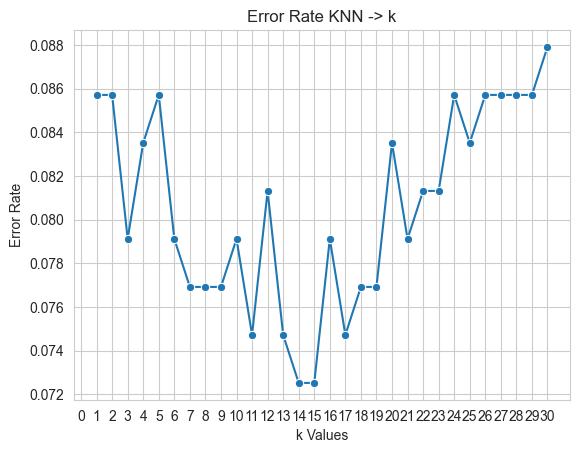

In [121]:
# plotting error_rates
sns.lineplot(x=range(1, 31), y=error_rates, marker='o')
plt.xticks(range(31))
plt.title('Error Rate KNN -> k')
plt.xlabel('k Values')
plt.ylabel('Error Rate');

In [122]:
# min error_rate
min_error = min(error_rates)
print(f"Min error_rate: {min_error:.3f}")

Min error_rate: 0.073


In [123]:
# best k for min error rate
best_k = error_rates.index(min_error) + 1
print(f"Best k with min error rate ({min_error:.3f}) is k-Nr.: {best_k}")

Best k with min error rate (0.073) is k-Nr.: 14


In [124]:
# hyperparams
new_knn = KNeighborsClassifier()
new_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [125]:
# defining params
new_knn_range = np.arange(1, 31)
grid_params = {'n_neighbors': new_knn_range,
			   'weights': ['uniform', 'distance'],
			   'metric': ['euclidean', 'manhattan']}

In [126]:
# grid search
grid = GridSearchCV(new_knn, grid_params, verbose=1, cv=5)
grid_results = grid.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [127]:
# best result out of 120 runs
print(f"Best result out of 120 runs: {grid_results.best_score_:.3f}")
print(f"For compare the accuracy: {1 - min_error:.3f}")

Best result out of 120 runs: 0.932
For compare the accuracy: 0.927


In [128]:
# best params
print(f"Best params: {grid_results.best_params_}")

Best params: {'metric': 'manhattan', 'n_neighbors': np.int64(11), 'weights': 'distance'}


In [129]:
# final model
best_params = grid_results.best_params_
final_knn = KNeighborsClassifier(**best_params)
final_knn.fit(X_train, y_train)
final_knn.score(X_test, y_test)

0.9210526315789473

In [130]:
# save model
with open("breast_cancer_diagnosis_model.pkl", "wb") as f:
	pickle.dump(final_knn, f)

In [131]:
# load model
bc_diagnosis_model = pickle.load(open("breast_cancer_diagnosis_model.pkl", "rb"))

In [132]:
# X test predictions
pred_results = bc_diagnosis_model.predict(X_test)
print(f"Predictions: {pred_results}")

Predictions: ['B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'B' 'B' 'B' 'M' 'M']
